## KMEANS

## READ DATASET


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

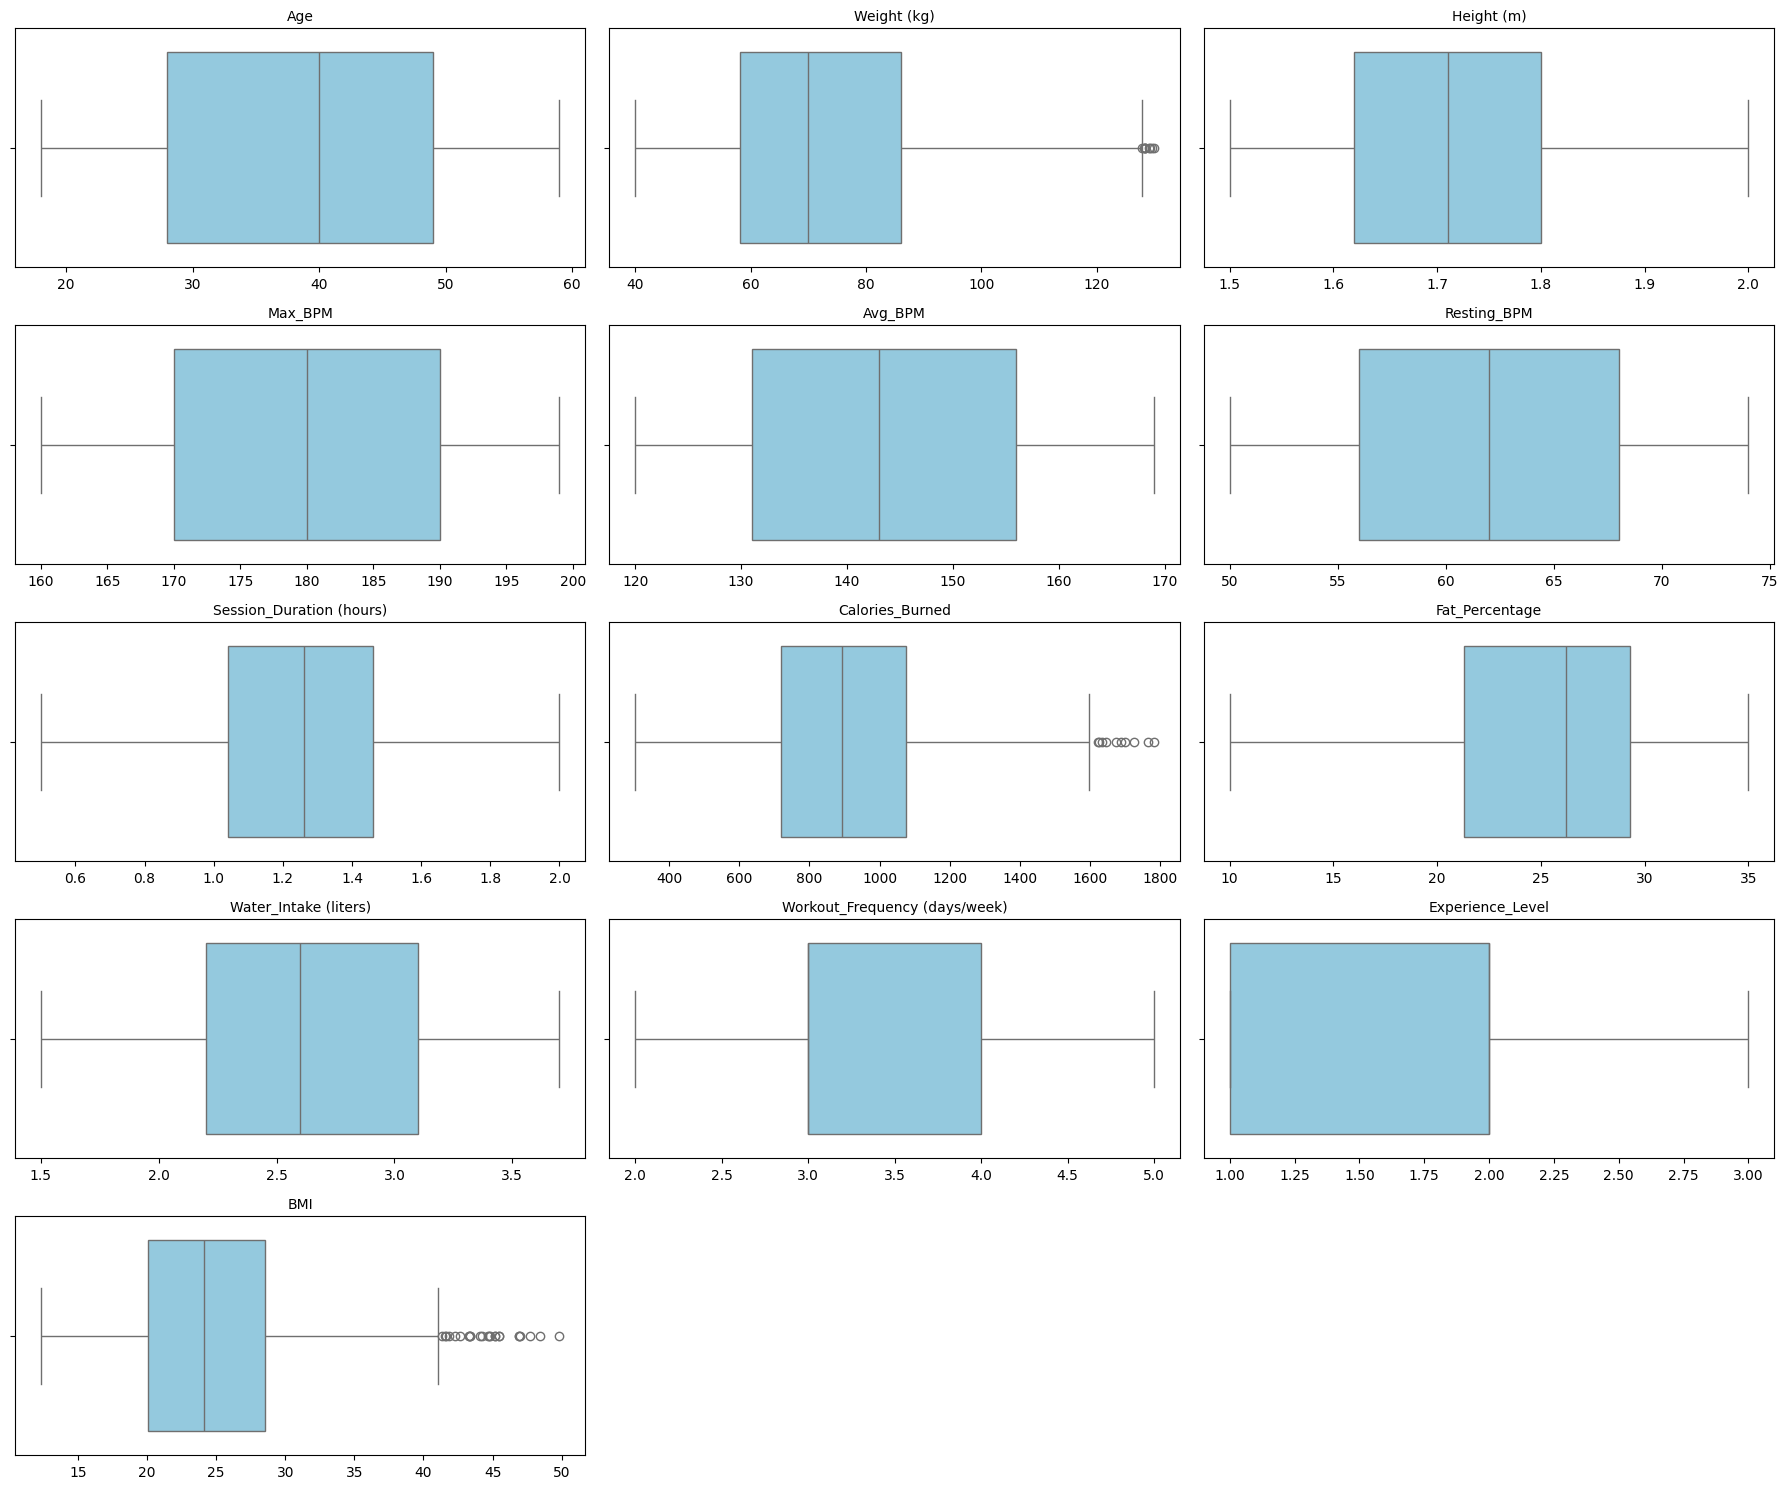

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='skyblue')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder 

label_encoders = {}
for column in ['Gender', 'Workout_Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1         88.3        1.71      180      157           60   
1     46       0         74.9        1.53      179      151           66   
2     32       0         68.1        1.66      167      122           54   
3     25       1         53.2        1.70      190      164           56   
4     38       1         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       1         87.1        1.74      187      158           67   
969   25       1         66.6        1.61      184      166           56   
970   59       0         60.4        1.76      194      120           53   
971   32       1        126.4        1.83      198      146           62   
972   46       1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                        1.69           1313.0             3            12.6   
1                        1.30            883.0             1            33.9   
2                        1.11            677.0             0            33.4   
3                        0.59            532.0             2            28.8   
4                        0.64            556.0             2            29.2   
..                        ...              ...           ...             ...   
968                      1.57           1364.0             2            10.0   
969                      1.38           1260.0             2            25.0   
970                      1.72            929.0             0            18.8   
971                      1.10            883.0             1            28.2   
972                      0.75            542.0             2            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [6]:
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
kolom_numerik


['Age',
 'Gender',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Workout_Type',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

In [7]:
import numpy as np
def bersihkan_outlier(df, kolom, metode='zscore', threshold=3):
    if metode == 'zscore':
        # Metode Z-score
        z_scores = np.abs((df[kolom] - df[kolom].mean()) / df[kolom].std())
        return df[z_scores < threshold]
    
    elif metode == 'iqr':
        # Metode IQR (Interquartile Range)
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1
        
        batas_bawah = Q1 - threshold * IQR
        batas_atas = Q3 + threshold * IQR
        
        return df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

df = bersihkan_outlier(df, kolom_numerik, metode='zscore', threshold=2)
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

Beberapa saran untuk mengatasi masalah outlier yang persisten:
Gunakan threshold yang lebih ketat:
Z-score: turunkan dari 3 menjadi 2.5 atau 2
IQR: turunkan dari 1.5 menjadi 1.3 atau 1

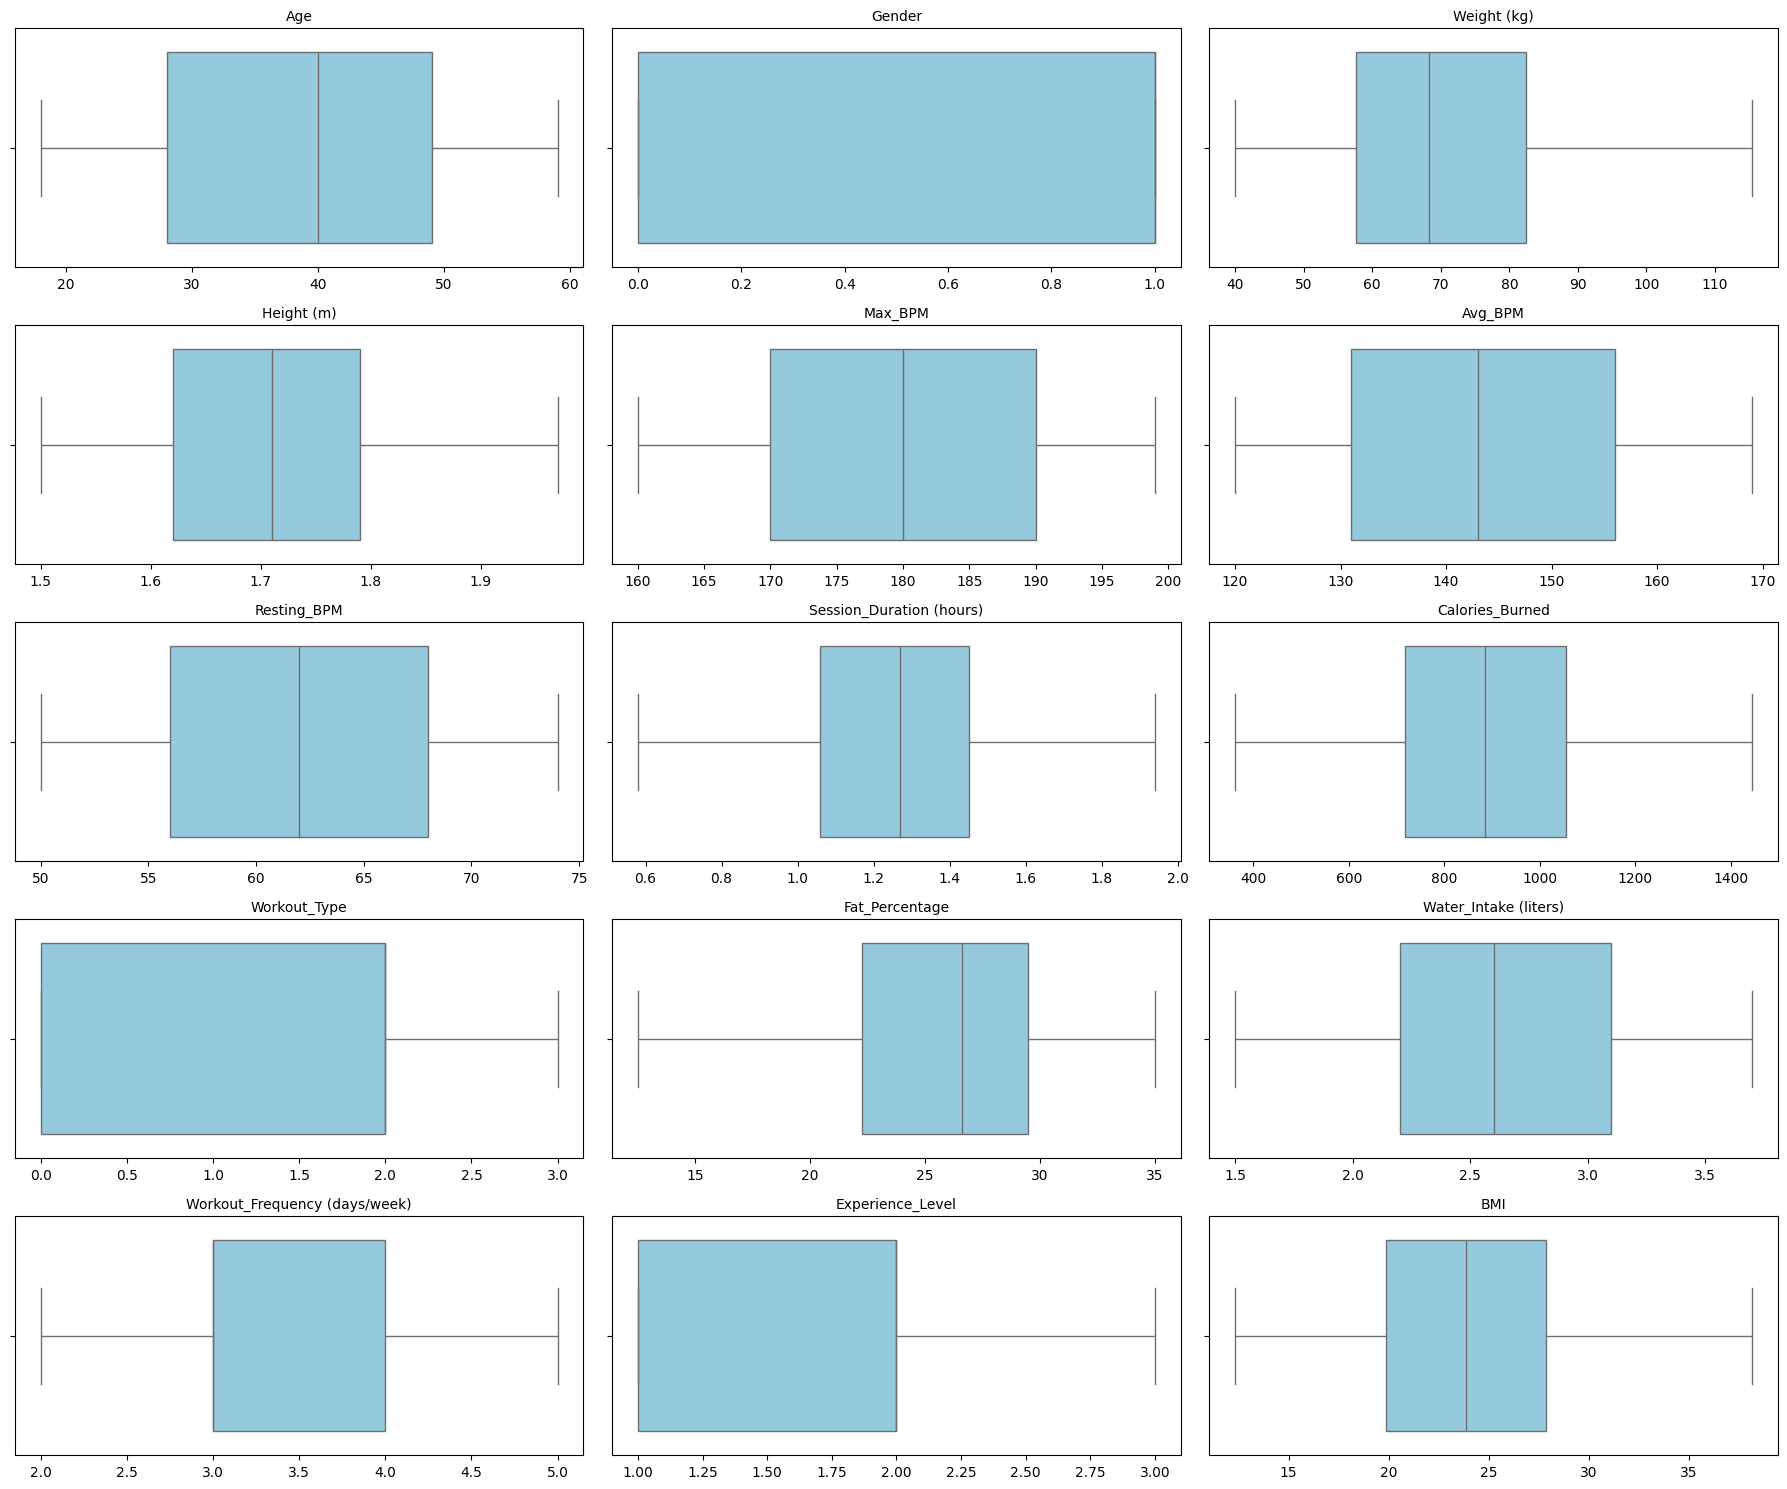

In [8]:
um_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='skyblue')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [9]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()


Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [10]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

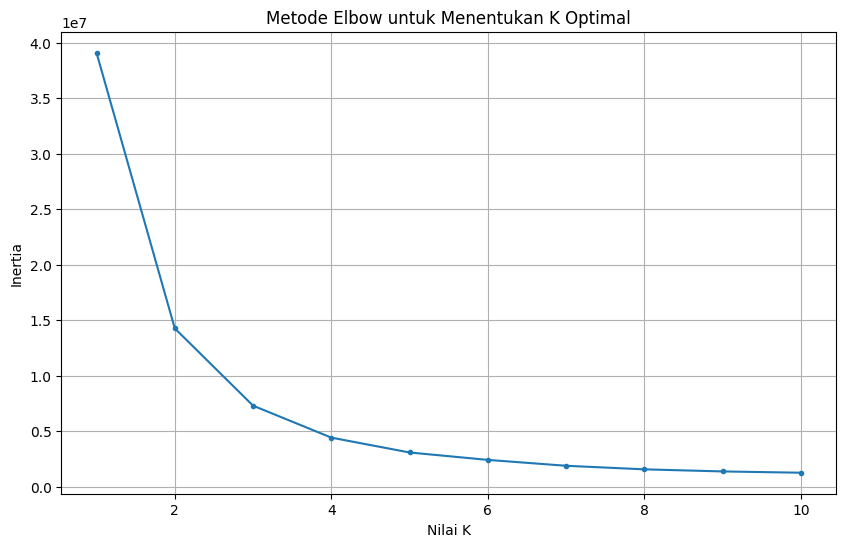

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='.')
plt.grid(True)
plt.xlabel('Nilai K')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

In [13]:
df_cluster = df.copy()
df_cluster['Cluster'] = kmeans.labels_
df_cluster.head()
# Session_Duration (hours), Workout_Type, Max_BPM, Avg_BPM, Resting_BPM, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Cluster  
0  30.20        1  
1  32.00        1  
2  24.71        0  
3  18.41        0  
4  14.39        0

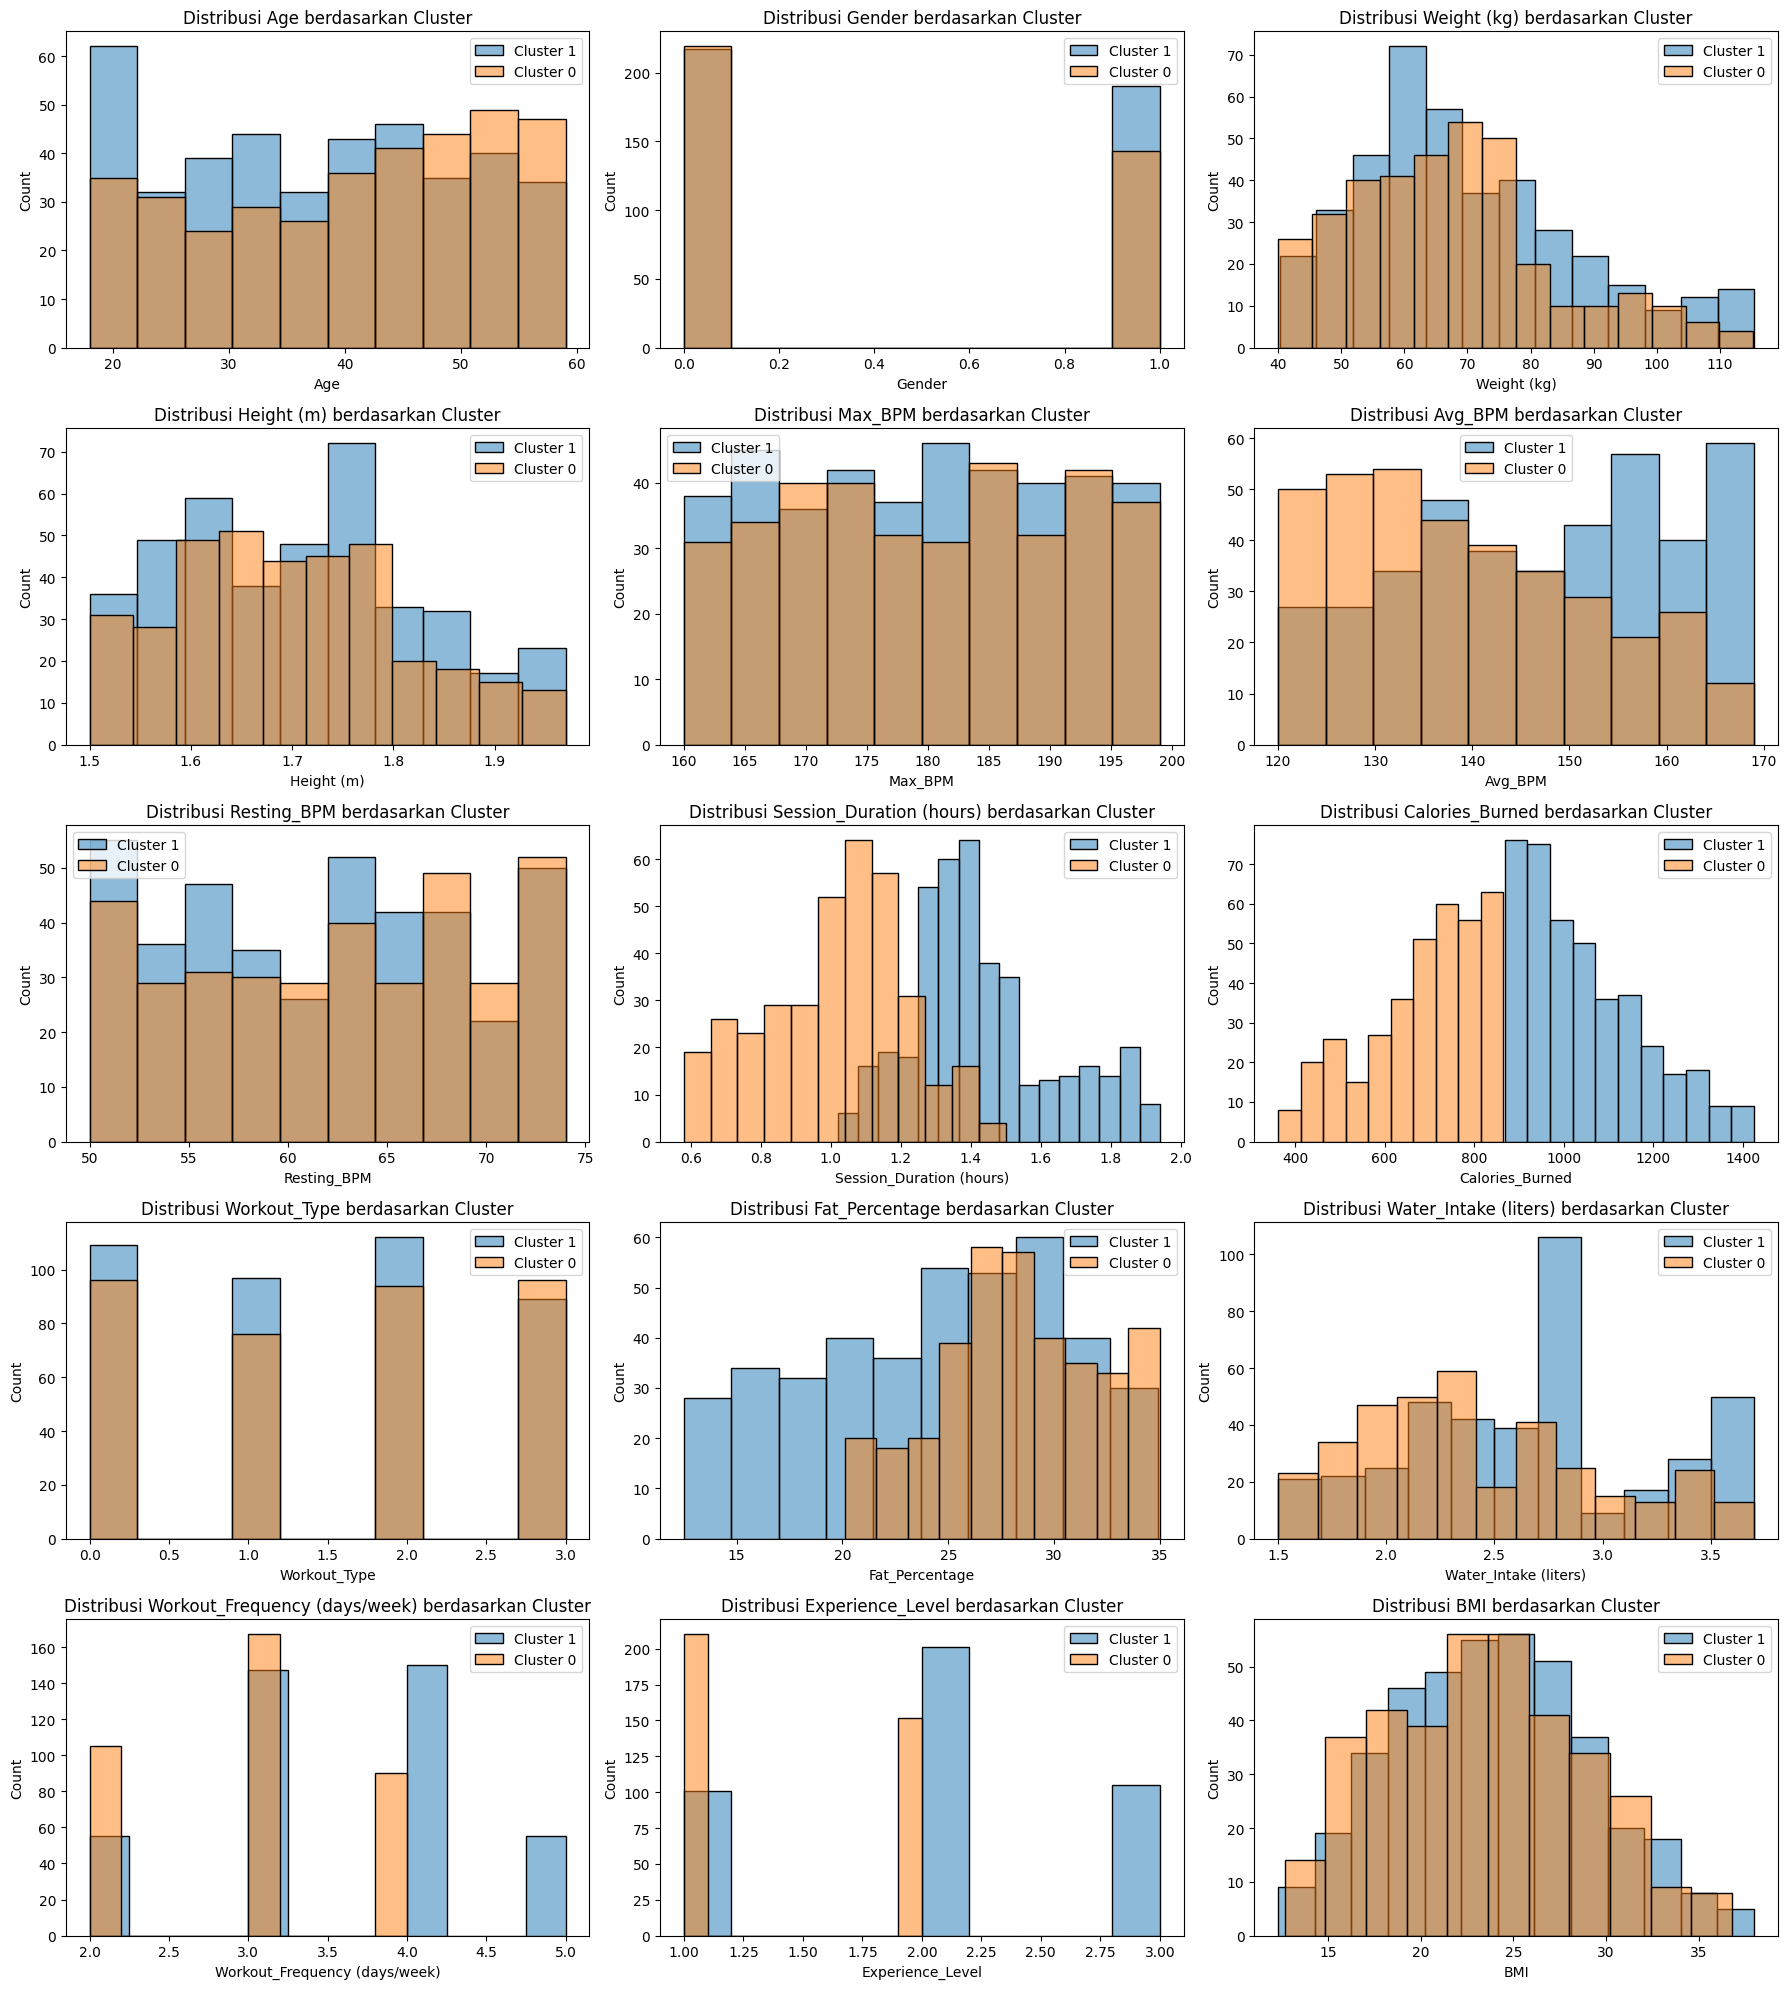

In [14]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

axes = axes.flatten()

for i, kolom in enumerate(df.columns):
    for cluster in df_cluster['Cluster'].unique():
        sns.histplot(data=df_cluster[df_cluster['Cluster'] == cluster],
                     x=kolom,
                     label=f'Cluster {cluster}',
                     alpha=0.5,
                     ax=axes[i])
    axes[i].set_title(f'Distribusi {kolom} berdasarkan Cluster')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

beberapa insight yang dapat diambil:
1. Distribusi Usia (Age):
* Cluster 0 memiliki distribusi usia yang lebih muda, dengan mayoritas anggota berusia 20-40 tahun
* Cluster 1 cenderung memiliki anggota yang lebih tua, dengan distribusi usia yang lebih merata antara 30-60 tahun
2. Berat Badan (Weight):
* Cluster 0 memiliki distribusi berat badan yang lebih rendah (40-70 kg)
* Cluster 1 memiliki distribusi berat badan yang lebih tinggi (70-100 kg)
3. Tinggi Badan (Height):
* Tidak ada perbedaan yang signifikan dalam distribusi tinggi badan antar cluster
* Kedua cluster memiliki rentang tinggi badan yang mirip
4. Detak Jantung (Max_BPM, Avg_BPM, Resting_BPM):
* Cluster 0 cenderung memiliki detak jantung maksimum dan rata-rata yang lebih tinggi
* Cluster 1 memiliki detak jantung istirahat yang lebih rendah
5. Durasi Latihan (Session_Duration):
* Cluster 0 cenderung memiliki durasi latihan yang lebih pendek
* Cluster 1 memiliki variasi durasi latihan yang lebih besar
6. Kalori Terbakar (Calories_Burned):
* Cluster 1 memiliki rata-rata pembakaran kalori yang lebih tinggi
* Cluster 0 memiliki pembakaran kalori yang lebih rendah dan konsisten
7. Persentase Lemak (Fat_Percentage):
* Cluster 0 memiliki persentase lemak yang lebih rendah
* Cluster 1 memiliki persentase lemak yang lebih tinggi
8. Asupan Air (Water_Intake):
* Cluster 1 memiliki asupan air yang lebih tinggi
* Cluster 0 memiliki asupan air yang lebih rendah
9. Frekuensi Latihan (Workout_Frequency):
* Tidak ada perbedaan yang sangat signifikan dalam frekuensi latihan antar cluster
* Kedua cluster memiliki distribusi yang mirip
10 Level Pengalaman (Experience_Level):
* Cluster 0 cenderung memiliki level pengalaman yang lebih rendah
* Cluster 1 memiliki variasi level pengalaman yang lebih tinggi
11. BMI:
* Cluster 0 memiliki BMI yang lebih rendah dan normal
* Cluster 1 memiliki BMI yang lebih tinggi, menunjukkan kecenderungan kelebihan berat badan
12. Kesimpulan Umum:
* Cluster 0 cenderung mewakili kelompok yang lebih muda, lebih ringan, dengan intensitas latihan yang lebih tinggi tapi durasi lebih pendek
* Cluster 1 mewakili kelompok yang lebih tua, lebih berat, dengan durasi latihan yang lebih bervariasi dan pembakaran kalori yang lebih tinggi
13. Insight ini dapat digunakan untuk:
* Menyesuaikan program latihan berdasarkan karakteristik masing-masing cluster
* Merancang strategi nutrisi dan hidrasi yang sesuai
* Mengembangkan program pembinaan yang lebih personal berdasarkan level pengalaman
* Menetapkan target yang realistis berdasarkan profil masing-masing cluster

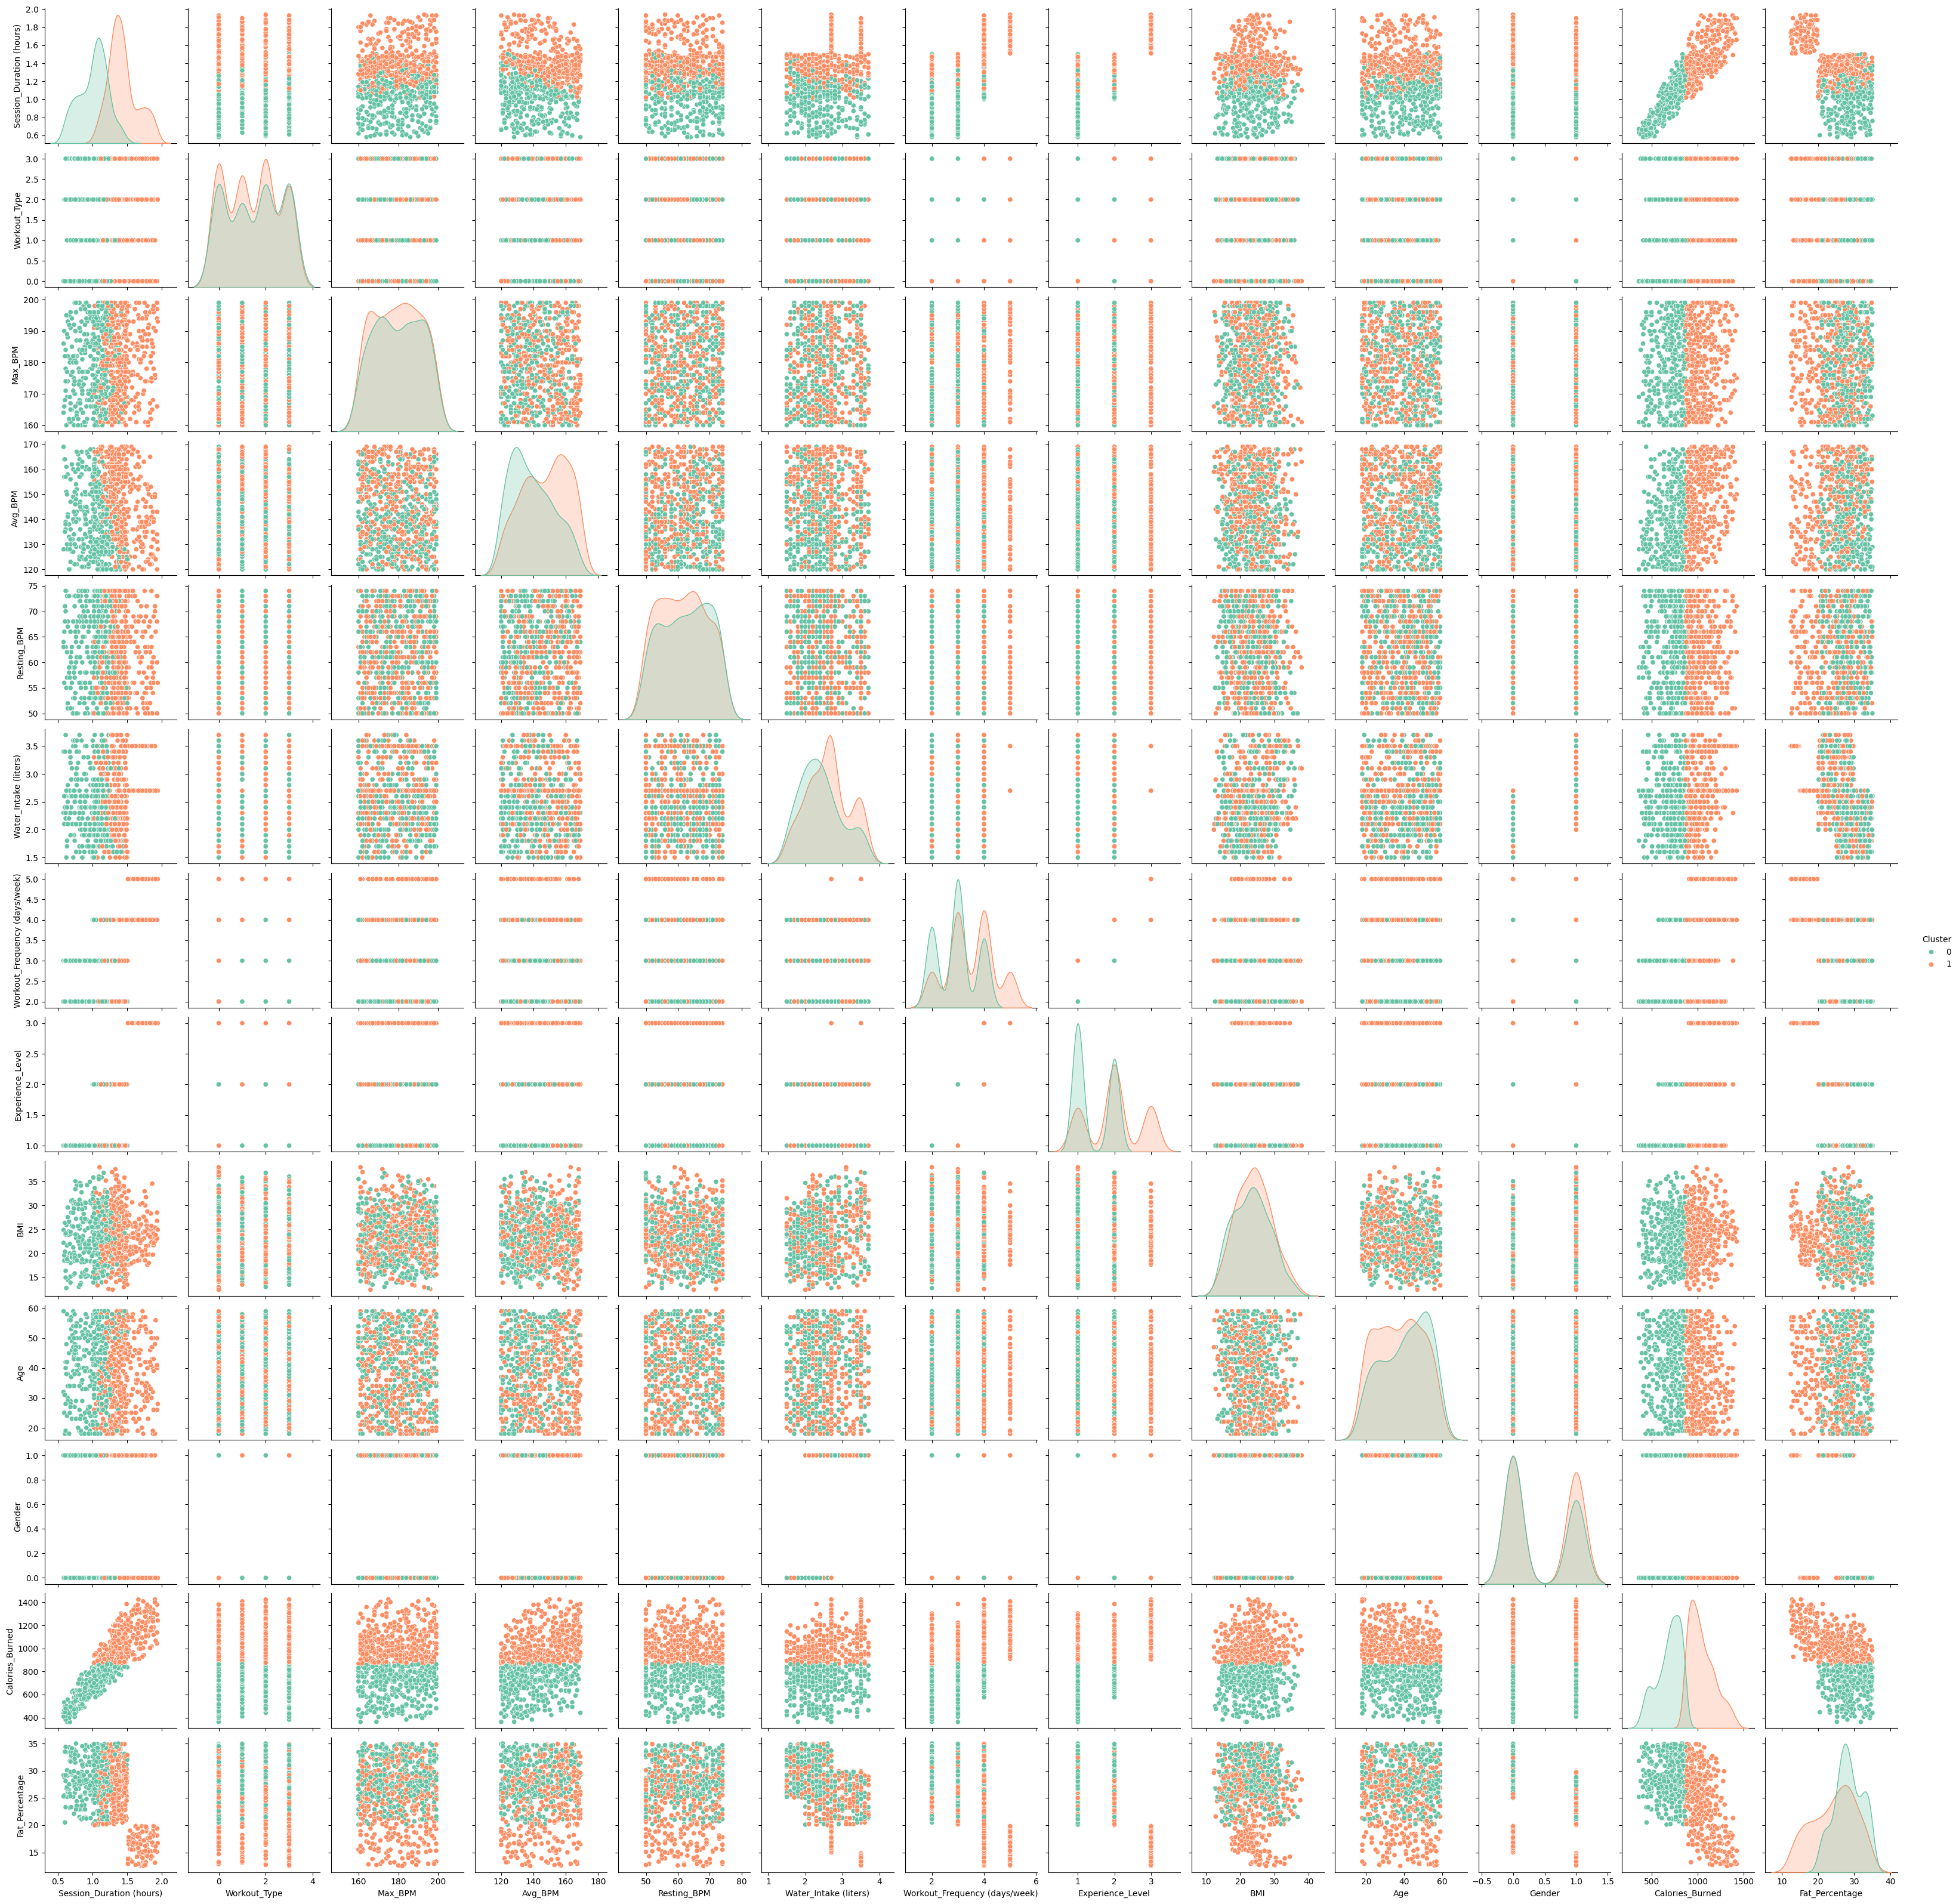

In [15]:
kolom_penting = ['Session_Duration (hours)', 'Workout_Type', 'Max_BPM', 'Avg_BPM', 
                 'Resting_BPM', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 
                 'Experience_Level', 'BMI', 'Age', 'Gender', 'Calories_Burned', 'Fat_Percentage']
sns.pairplot(df_cluster[kolom_penting + ['Cluster']], hue='Cluster', diag_kind='kde', palette='Set2')
plt.show()

Berdasarkan hasil visualisasi pairplot dari beberapa kolom diperoleh bahwa:
1.	Age vs BMI
- Cluster 0: Dominan pada usia muda dengan BMI di rentang normal hingga sedikit overweight.
- Cluster 1: Tersebar pada usia yang lebih tua dengan BMI lebih tinggi, mencakup overweight hingga obesitas.
- Hubungan: Ada korelasi positif lemah antara usia dan BMI; usia yang bertambah cenderung memiliki BMI lebih tinggi.
2.	Age vs Calories_Burned
- Cluster 0: Memiliki pembakaran kalori lebih rendah, terutama di usia muda.
- Cluster 1: Pembakaran kalori lebih tinggi secara konsisten di berbagai rentang usia.
- Hubungan: Tidak ada korelasi kuat antara usia dan kalori yang terbakar, tetapi cluster membantu menunjukkan pola unik.
3.	Workout_Frequency (days/week) vs Water_Intake (liters)
- Cluster 0: Cenderung memiliki frekuensi olahraga rendah (1-3 hari/minggu) dengan asupan air di bawah rata-rata (<2 liter).
- Cluster 1: Lebih banyak melakukan olahraga (4-6 hari/minggu) dengan asupan air lebih tinggi (>2 liter).
- Hubungan: Terdapat korelasi positif moderat; individu yang berolahraga lebih sering cenderung mengonsumsi lebih banyak air.
4.	Max_BPM vs Avg_BPM
- Cluster 0: Rata-rata detak jantung lebih rendah, dengan Max_BPM cenderung di bawah 160.
- Cluster 1: Rata-rata detak jantung lebih tinggi, dengan Max_BPM mencapai 180 ke atas.
- Hubungan: Terdapat hubungan linear yang kuat antara Max_BPM dan Avg_BPM, yang sesuai secara fisiologis.
5.	Calories_Burned vs BMI
- Cluster 0: Pembakaran kalori lebih rendah dengan BMI yang normal atau sedikit overweight.
- Cluster 1: Pembakaran kalori lebih tinggi pada BMI overweight hingga obesitas.
- Hubungan: Tidak ada korelasi kuat antara BMI dan kalori yang terbakar, tetapi cluster memperlihatkan pembagian yang jelas.
6.	Workout_Type vs Experience_Level
- Cluster 0: Kebanyakan memiliki tipe latihan yang lebih ringan dengan tingkat pengalaman pemula.
- Cluster 1: Lebih banyak individu pada tipe latihan berat dengan tingkat pengalaman lebih tinggi.
- Hubungan: Cluster membedakan pola dengan baik; tingkat pengalaman menentukan intensitas latihan.
7.	Resting_BPM vs Max_BPM
- Cluster 0: Detak jantung istirahat lebih rendah dengan Max_BPM cenderung lebih moderat.
- Cluster 1: Detak jantung istirahat lebih tinggi dengan Max_BPM yang lebih tinggi.
- Hubungan: Hubungan positif moderat; Max_BPM meningkat seiring dengan peningkatan Resting_BPM.
8.	Session_Duration (hours) vs Calories_Burned
- Cluster 0: Waktu latihan lebih singkat (di bawah 1 jam) dengan pembakaran kalori lebih rendah (<300 kalori).
- Cluster 1: Waktu latihan lebih lama (di atas 1 jam) dengan pembakaran kalori lebih tinggi (>500 kalori).
- Hubungan: Ada hubungan positif moderat; semakin lama durasi latihan, semakin banyak kalori yang terbakar.
9.	Water_Intake vs BMI
- Cluster 0: Asupan air cenderung lebih rendah dengan BMI di rentang normal hingga overweight.
- Cluster 1: Asupan air lebih tinggi pada BMI overweight hingga obesitas.
- Hubungan: Tidak ada korelasi kuat antara asupan air dan BMI, tetapi cluster membantu menunjukkan pola berbeda.
10.	Workout_Frequency vs Age
- Cluster 0: Frekuensi latihan lebih rendah pada usia muda hingga menengah.
- Cluster 1: Frekuensi latihan lebih tinggi pada usia lebih tua.
- Hubungan: Tidak ada hubungan langsung antara frekuensi latihan dan usia, tetapi cluster memperlihatkan pola gaya hidup yang berbeda.
11.	Session_Duration (hours) vs Workout_Type
- Cluster 0: Durasi sesi latihan cenderung lebih pendek (di bawah 1 jam) dengan tipe latihan yang lebih ringan.
- Cluster 1: Durasi sesi latihan lebih panjang (1-2 jam) dengan tipe latihan yang lebih berat atau intensif.
- Hubungan: Terdapat keterkaitan moderat; durasi latihan sering mencerminkan jenis latihan yang dilakukan.
12.	Session_Duration (hours) vs Max_BPM
- Cluster 0: Durasi sesi yang pendek (di bawah 1 jam) cenderung memiliki Max_BPM yang lebih rendah (<160).
- Cluster 1: Durasi sesi lebih panjang dengan Max_BPM yang lebih tinggi (>170).
- Hubungan: Hubungan positif lemah; durasi latihan yang lebih panjang cenderung meningkatkan Max_BPM.
13.	Session_Duration (hours) vs Avg_BPM
- Cluster 0: Avg_BPM cenderung lebih rendah pada sesi latihan pendek.
- Cluster 1: Avg_BPM lebih tinggi pada durasi latihan yang panjang.
- Hubungan: Hubungan positif moderat; rata-rata BPM meningkat dengan durasi latihan yang lebih lama.
14.	Session_Duration (hours) vs Resting_BPM
- Cluster 0: Resting_BPM lebih rendah pada individu dengan sesi latihan pendek.
- Cluster 1: Resting_BPM lebih tinggi, terutama pada individu yang berlatih lebih lama.
- Hubungan: Tidak ada hubungan langsung, tetapi cluster menunjukkan perbedaan yang signifikan.
15.	Session_Duration (hours) vs Water_Intake (liters)
- Cluster 0: Asupan air lebih rendah (di bawah 2 liter) pada sesi latihan pendek.
- Cluster 1: Asupan air lebih tinggi (di atas 2 liter) pada sesi latihan yang lebih lama.
- Hubungan: Hubungan positif moderat; durasi sesi memengaruhi kebutuhan asupan air.
16.	Max_BPM vs Avg_BPM
- Cluster 0: Max_BPM dan Avg_BPM cenderung lebih rendah, dengan hubungan linear yang terlihat jelas.
- Cluster 1: Max_BPM lebih tinggi dengan Avg_BPM juga meningkat, menunjukkan pola linear.
- Hubungan: Korelasi positif kuat; Max_BPM meningkat seiring dengan Avg_BPM.
17.	Max_BPM vs Resting_BPM
- Cluster 0: Resting_BPM lebih rendah dengan Max_BPM juga lebih rendah (<160).
- Cluster 1: Resting_BPM lebih tinggi dengan Max_BPM mencapai 180+.
- Hubungan: Hubungan positif moderat; peningkatan Resting_BPM terkait dengan peningkatan Max_BPM.
18.	Max_BPM vs Water_Intake (liters)
- Cluster 0: Max_BPM lebih rendah dengan asupan air yang juga lebih sedikit (<2 liter).
- Cluster 1: Max_BPM lebih tinggi dengan asupan air di atas 2 liter.
- Hubungan: Korelasi positif lemah; Max_BPM cenderung meningkat dengan asupan air lebih tinggi.
19.	Calories_Burned vs Water_Intake (liters)
- Cluster 0: Kalori yang terbakar lebih sedikit (di bawah 300) dengan asupan air lebih rendah.
- Cluster 1: Kalori yang terbakar lebih tinggi (>500) dengan asupan air lebih tinggi (>2 liter).
- Hubungan: Hubungan positif moderat; asupan air yang lebih tinggi terkait dengan pembakaran kalori lebih banyak.
20.	Resting_BPM vs BMI
- Cluster 0: Resting_BPM lebih rendah pada BMI normal hingga overweight.
- Cluster 1: Resting_BPM lebih tinggi pada BMI overweight hingga obesitas.
- Hubungan: Hubungan positif lemah; BMI lebih tinggi cenderung terkait dengan Resting_BPM yang lebih tinggi.
21.	Workout_Type vs Age
- Cluster 0: Workout_Type cenderung lebih ringan pada usia muda hingga dewasa awal.
- Cluster 1: Workout_Type lebih berat atau intensif pada usia yang lebih tua.
- Hubungan: Hubungan tidak langsung; usia lebih tua cenderung melakukan latihan lebih intensif.
22.	Experience_Level vs Calories_Burned
- Cluster 0: Pemula membakar kalori lebih sedikit (di bawah 300).
- Cluster 1: Tingkat pengalaman lebih tinggi membakar kalori lebih banyak (>500).
- Hubungan: Tingkat pengalaman memiliki pengaruh signifikan terhadap jumlah kalori yang terbakar.
23.	Workout_Frequency vs BMI
- Cluster 0: Frekuensi latihan rendah (1-3 hari/minggu) pada BMI normal hingga overweight.
- Cluster 1: Frekuensi latihan tinggi (4-6 hari/minggu) pada BMI overweight hingga obesitas.
- Hubungan: Tidak ada hubungan langsung antara frekuensi latihan dan BMI, tetapi cluster membantu menunjukkan pola gaya hidup yang berbeda.
24.	Gender vs Fat_Percentage
- Cluster 0: Persentase lemak tubuh lebih rendah untuk individu pria, terutama pada cluster ini.
- Cluster 1: Persentase lemak tubuh lebih tinggi untuk individu wanita pada cluster ini.
- Hubungan: Hubungan tidak langsung; gender menunjukkan perbedaan alami dalam distribusi lemak tubuh.
25.	Session_Duration (hours) vs BMI
- Cluster 0: Sesi latihan pendek (di bawah 1 jam) dengan BMI normal hingga overweight.
- Cluster 1: Sesi latihan lebih lama (1-2 jam) dengan BMI overweight hingga obesitas.
- Hubungan: Tidak ada hubungan langsung antara durasi latihan dan BMI, tetapi cluster menunjukkan pola gaya hidup yang berbeda.
26.	Session_Duration (hours) vs Calories_Burned
- Cluster 0: Sesi latihan pendek (di bawah 1 jam) menghasilkan pembakaran kalori yang rendah (<300).
- Cluster 1: Sesi latihan lebih lama (>1 jam) menghasilkan pembakaran kalori yang lebih tinggi (>500).
- Hubungan: Hubungan positif moderat; semakin lama sesi latihan, semakin banyak kalori yang terbakar.
27.	Session_Duration (hours) vs Fat_Percentage
- Cluster 0: Durasi latihan lebih pendek pada individu dengan persentase lemak tubuh lebih rendah.
- Cluster 1: Durasi latihan lebih panjang pada individu dengan persentase lemak tubuh lebih tinggi.
- Hubungan: Tidak ada korelasi kuat, tetapi cluster menunjukkan pola perbedaan gaya hidup.
28.	Workout_Type vs Max_BPM
- Cluster 0: Tipe latihan ringan cenderung memiliki Max_BPM lebih rendah.
- Cluster 1: Tipe latihan intensif menunjukkan Max_BPM lebih tinggi (>170).
- Hubungan: Hubungan tidak langsung; tipe latihan memengaruhi intensitas detak jantung maksimal.
29.	Workout_Type vs Avg_BPM
-	Cluster 0: Tipe latihan ringan dengan Avg_BPM lebih rendah (<120).
-	Cluster 1: Tipe latihan berat dengan Avg_BPM lebih tinggi (>140).
-	Hubungan: Hubungan positif lemah; tipe latihan berkorelasi dengan Avg_BPM.
30.	Workout_Type vs Resting_BPM
-	Cluster 0: Resting_BPM lebih rendah pada tipe latihan ringan.
-	Cluster 1: Resting_BPM lebih tinggi pada tipe latihan berat.
-	Hubungan: Hubungan tidak langsung; Resting_BPM lebih tinggi pada individu dengan gaya hidup yang lebih intens.
31.	Workout_Type vs Water_Intake (liters)
-	Cluster 0: Asupan air lebih rendah (<2 liter) pada tipe latihan ringan.
-	Cluster 1: Asupan air lebih tinggi (>2 liter) pada tipe latihan berat.
-	Hubungan: Hubungan positif moderat; tipe latihan yang lebih berat membutuhkan asupan air lebih tinggi.
32.	Workout_Type vs BMI
-	Cluster 0: Tipe latihan ringan pada BMI normal hingga overweight.
-	Cluster 1: Tipe latihan berat pada BMI overweight hingga obesitas.
-	Hubungan: Hubungan tidak langsung; BMI tinggi lebih sering dikaitkan dengan tipe latihan berat.
33.	Workout_Type vs Calories_Burned
-	Cluster 0: Tipe latihan ringan menghasilkan pembakaran kalori yang lebih rendah (<300).
-	Cluster 1: Tipe latihan berat menghasilkan pembakaran kalori lebih tinggi (>500).
-	Hubungan: Hubungan positif moderat; tipe latihan memengaruhi jumlah kalori yang terbakar.
34.	Workout_Type vs Fat_Percentage
-	Cluster 0: Persentase lemak tubuh lebih rendah pada individu dengan tipe latihan ringan.
-	Cluster 1: Persentase lemak tubuh lebih tinggi pada tipe latihan berat.
-	Hubungan: Tidak ada hubungan langsung, tetapi cluster menunjukkan perbedaan pola.
35.	Workout_Type vs Workout_Frequency (days/week)
-	Cluster 0: Frekuensi latihan lebih rendah (1-3 hari/minggu) pada tipe latihan ringan.
-	Cluster 1: Frekuensi latihan lebih tinggi (4-6 hari/minggu) pada tipe latihan berat.
-	Hubungan: Hubungan positif moderat; tipe latihan berat memerlukan frekuensi latihan yang lebih tinggi.
36.	Workout_Type vs Experience_Level
-	Cluster 0: Tipe latihan ringan pada individu dengan pengalaman pemula.
-	Cluster 1: Tipe latihan berat pada individu dengan pengalaman lebih tinggi.
-	Hubungan: Hubungan positif kuat; tingkat pengalaman sangat memengaruhi tipe latihan.
37.	Workout_Type vs Age
-	Cluster 0: Individu muda lebih sering melakukan tipe latihan ringan.
-	Cluster 1: Individu yang lebih tua cenderung melakukan tipe latihan berat.
-	Hubungan: Tidak ada hubungan langsung, tetapi usia memengaruhi preferensi jenis latihan.
38.	Workout_Type vs Gender
-	Cluster 0: Gender tidak terlalu memengaruhi tipe latihan, tetapi ada sedikit preferensi tipe latihan ringan.
-	Cluster 1: Gender juga tidak signifikan, tetapi tipe latihan berat lebih sering dilakukan.
-	Hubungan: Tidak ada hubungan langsung antara gender dan tipe latihan.
39.	Max_BPM vs Fat_Percentage
-	Cluster 0: Fat_Percentage lebih rendah pada individu dengan Max_BPM yang lebih rendah (<160).
-	Cluster 1: Fat_Percentage lebih tinggi pada individu dengan Max_BPM yang lebih tinggi (>170).
-	Hubungan: Korelasi lemah; Max_BPM sedikit dipengaruhi oleh Fat_Percentage.
40.	Avg_BPM vs Fat_Percentage
-	Cluster 0: Fat_Percentage lebih rendah pada Avg_BPM lebih rendah.
-	Cluster 1: Fat_Percentage lebih tinggi pada Avg_BPM lebih tinggi.
-	Hubungan: Hubungan lemah; Avg_BPM menunjukkan pola yang mirip dengan Max_BPM.
41.	Resting_BPM vs Fat_Percentage
-	Cluster 0: Resting_BPM lebih rendah pada Fat_Percentage lebih rendah.
-	Cluster 1: Resting_BPM lebih tinggi pada Fat_Percentage lebih tinggi.
-	Hubungan: Korelasi positif moderat; Resting_BPM meningkat dengan Fat_Percentage.
42.	BMI vs Fat_Percentage
-	Cluster 0: BMI normal hingga overweight dengan Fat_Percentage lebih rendah.
-	Cluster 1: BMI overweight hingga obesitas dengan Fat_Percentage lebih tinggi.
-	Hubungan: Korelasi positif kuat; BMI tinggi sering dikaitkan dengan Fat_Percentage yang lebih tinggi.
43.	Age vs Workout_Frequency (days/week)
-	Cluster 0: Individu muda cenderung memiliki frekuensi latihan lebih rendah (1-3 hari/minggu).
-	Cluster 1: Individu lebih tua cenderung memiliki frekuensi latihan lebih tinggi (4-6 hari/minggu).
-	Hubungan: Hubungan positif moderat; usia dapat memengaruhi pola frekuensi latihan.
44.	Experience_Level vs BMI
-	Cluster 0: Pemula cenderung memiliki BMI normal hingga overweight.
-	Cluster 1: Individu dengan pengalaman lebih tinggi memiliki BMI overweight hingga obesitas.
-	Hubungan: Tidak ada hubungan langsung, tetapi pengalaman lebih tinggi sering ditemukan pada BMI lebih tinggi.
45.	Experience_Level vs Calories_Burned
-	Cluster 0: Pemula membakar lebih sedikit kalori (<300).
-	Cluster 1: Tingkat pengalaman lebih tinggi menghasilkan pembakaran kalori lebih tinggi (>500).
-	Hubungan: Hubungan positif kuat; tingkat pengalaman memengaruhi jumlah kalori yang terbakar.
46.	Experience_Level vs Fat_Percentage
-	Cluster 0: Pemula memiliki Fat_Percentage lebih rendah.
-	Cluster 1: Individu dengan pengalaman lebih tinggi memiliki Fat_Percentage lebih tinggi.
-	Hubungan: Tidak ada hubungan langsung, tetapi pola berbeda terlihat di antara cluster.
47.	Gender vs Workout_Frequency (days/week)
-	Cluster 0: Gender tidak memengaruhi frekuensi latihan secara signifikan.
-	Cluster 1: Sedikit pola yang menunjukkan bahwa gender tertentu memiliki frekuensi latihan lebih tinggi.
-	Hubungan: Tidak ada hubungan signifikan.


In [16]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [17]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_
pca_df.head()

PC1        PC2  Cluster
0  436.271902  15.479098        1
1    6.023912   5.681363        1
2 -200.508014   3.756738        0
3 -344.473135 -15.488296        0
4 -320.801011 -24.103245        0

<Axes: xlabel='PC1', ylabel='PC2'>

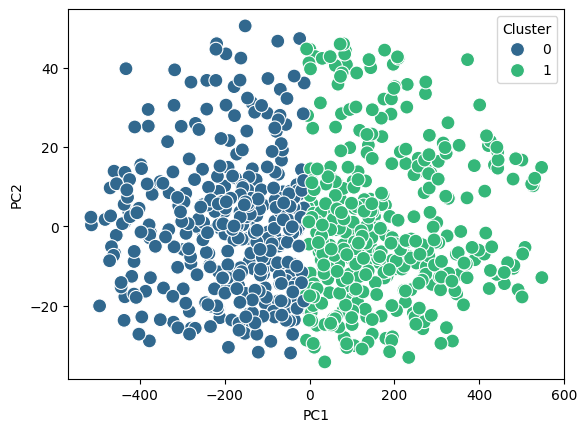

In [18]:
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)

In [19]:
siluet_skor = silhouette_score(df, kmeans.labels_)
print('Silhouette Score: ', siluet_skor)

Silhouette Score:  0.5244732669093549


## KMEANS TUNNING

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters' : range(2,8),
    'init' : ['k-means++'],
    'n_init' : ['auto'],
    'max_iter' : [100,300,500],
}

In [21]:
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)
grid_search.fit(df)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++'], 'max_iter': [100, 300, 500],
                         'n_clusters': range(2, 8), 'n_init': ['auto']})

In [22]:
best_score = -1
best_params = None

for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(df)
    score = silhouette_score(df, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 'auto'}
Best Silhouette Score: 0.5244732669093549


## DEPLOYMENT

In [23]:
!pip install streamlit 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install pyngrok


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!ngrok authtoken add-authtoken 2qNCmn5odDNsnD9ZUyJugWFafgH_4TPJ6MxAY2McQScUJ4wSU

authtoken - 

USAGE:
  ngrok authtoken TOKEN [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dashboar


ERROR:  accepts 1 arg(s), received 2


In [26]:
# Import yang diperlukan
import pickle
# Simpan model KMeans
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [27]:
import streamlit as st


In [1]:
%%writefile app_kmeans.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load data training untuk validasi range input
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Load model KMeans
with open('kmeans_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Judul aplikasi
st.title('Gym Member Clustering Prediction Kelompok 6')
st.write('Aplikasi ini membantu memprediksi cluster member gym berdasarkan karakteristik mereka')

# Form input 
st.header('Input Karakteristik Member')

col1, col2 = st.columns(2)

with col1:
    age = st.number_input('Age', 
                         min_value=int(df['Age'].min()),
                         max_value=int(df['Age'].max()),
                         value=int(df['Age'].mean()))
    
    gender = st.selectbox('Gender', ['Male', 'Female'])
    
    weight = st.number_input('Weight (kg)', 
                           min_value=float(df['Weight (kg)'].min()),
                           max_value=float(df['Weight (kg)'].max()),
                           value=float(df['Weight (kg)'].mean()))
    
    height = st.number_input('Height (m)', 
                           min_value=float(df['Height (m)'].min()),
                           max_value=float(df['Height (m)'].max()),
                           value=float(df['Height (m)'].mean()))
    
    max_bpm = st.number_input('Max BPM',
                             min_value=int(df['Max_BPM'].min()),
                             max_value=int(df['Max_BPM'].max()),
                             value=int(df['Max_BPM'].mean()))
    
    avg_bpm = st.number_input('Average BPM',
                             min_value=int(df['Avg_BPM'].min()),
                             max_value=int(df['Avg_BPM'].max()),
                             value=int(df['Avg_BPM'].mean()))
    
    resting_bpm = st.number_input('Resting BPM',
                                 min_value=int(df['Resting_BPM'].min()),
                                 max_value=int(df['Resting_BPM'].max()),
                                 value=int(df['Resting_BPM'].mean()))
    
with col2:
    session_duration = st.number_input('Session Duration (hours)',
                                     min_value=float(df['Session_Duration (hours)'].min()),
                                     max_value=float(df['Session_Duration (hours)'].max()),
                                     value=float(df['Session_Duration (hours)'].mean()))
    
    calories_burned = st.number_input('Calories Burned',
                                    min_value=float(df['Calories_Burned'].min()),
                                    max_value=float(df['Calories_Burned'].max()),
                                    value=float(df['Calories_Burned'].mean()))
    
    workout_type = st.selectbox('Workout Type', ['Cardio', 'Strength', 'HIIT', 'Yoga'])
    
    fat_percentage = st.number_input('Fat Percentage',
                                   min_value=float(df['Fat_Percentage'].min()),
                                   max_value=float(df['Fat_Percentage'].max()),
                                   value=float(df['Fat_Percentage'].mean()))
    
    water_intake = st.number_input('Water Intake (liters)',
                                 min_value=float(df['Water_Intake (liters)'].min()),
                                 max_value=float(df['Water_Intake (liters)'].max()),
                                 value=float(df['Water_Intake (liters)'].mean()))
    
    workout_frequency = st.slider('Workout Frequency (days/week)',
                                min_value=int(df['Workout_Frequency (days/week)'].min()),
                                max_value=int(df['Workout_Frequency (days/week)'].max()),
                                value=int(df['Workout_Frequency (days/week)'].mean()))
    
    experience_level = st.selectbox('Experience Level', [1, 2, 3],
                                  help='1: Beginner, 2: Intermediate, 3: Advanced')
    
    bmi = st.number_input('BMI',
                         min_value=float(df['BMI'].min()),
                         max_value=float(df['BMI'].max()),
                         value=float(df['BMI'].mean()))

# Encode categorical variables
gender_encoded = 1 if gender == 'Male' else 0
workout_type_mapping = {'Cardio': 0, 'Strength': 1, 'HIIT': 2, 'Yoga': 3}
workout_type_encoded = workout_type_mapping[workout_type]

# Tombol prediksi
if st.button('Predict Cluster'):
    try:
        # Siapkan data untuk prediksi
        input_data = np.array([[
            age, gender_encoded, weight, height, max_bpm, avg_bpm, 
            resting_bpm, session_duration, calories_burned, workout_type_encoded,
            fat_percentage, water_intake, workout_frequency, experience_level, bmi
        ]])
        
        # Lakukan prediksi
        cluster = model.predict(input_data)[0]
        
        # Tampilkan hasil
        st.header('Hasil Prediksi')
        
        if cluster == 0:
            st.success('Member termasuk dalam Cluster 0: Member High Performance')
            st.write("""
            Karakteristik Member High Performance:
            - Memiliki rata-rata kalori terbakar sangat tinggi (>1000 kalori)
            - Durasi latihan konsisten dan lebih lama (>1.5 jam)
            - Heart rate optimal (Max BPM 170-190, Avg BPM 150-170)
            - Fat percentage rendah (<20%)
            - Water intake tinggi (>3 liter)
            - Workout frequency tinggi (4-5 hari/minggu)
            - Experience level advanced (level 3)
            
            Rekomendasi:
            - Tingkatkan intensitas dengan program HIIT atau strength training
            - Tambahkan variasi latihan untuk mencegah plateau
            - Fokus pada target spesifik (muscle gain/endurance)
            - Pertahankan nutrisi dan hidrasi optimal
            - Ikuti program kompetitif atau challenge
            """)
        else:
            st.warning('Member termasuk dalam Cluster 1: Member Development')
            st.write("""
            Karakteristik Member Development:
            - Kalori terbakar moderate (500-800 kalori)
            - Durasi latihan lebih pendek (<1 jam)
            - Heart rate moderate (Max BPM 150-170, Avg BPM 120-140) 
            - Fat percentage lebih tinggi (>25%)
            - Water intake moderate (1.5-2.5 liter)
            - Workout frequency moderate (2-3 hari/minggu)
            - Experience level pemula-menengah (level 1-2)
            
            Rekomendasi:
            - Mulai dengan program dasar fokus pada form dan teknik
            - Tingkatkan durasi latihan secara bertahap
            - Kombinasikan cardio ringan dengan strength training dasar
            - Tetapkan target mingguan yang realistis
            - Tingkatkan frekuensi latihan secara bertahap
            - Edukasi nutrisi dan pentingnya hidrasi
            - Sediakan personal trainer untuk guidance
            """)
            
    except Exception as e:
        st.error(f'Terjadi kesalahan dalam prediksi: {str(e)}')

st.header('Cluster Distribution')
if st.checkbox('Show Cluster Distribution'):
    try:
        cluster_dist = pd.Series(model.labels_).value_counts()
        st.bar_chart(cluster_dist)
        st.write('Cluster Centers:', model.cluster_centers_)
    except Exception as e:
        st.error(f'Terjadi kesalahan dalam menampilkan distribusi cluster: {str(e)}')


Overwriting app_kmeans.py


In [ ]:
from pyngrok import ngrok
import threading
import os

def run_streamlit():
  os.system("streamlit run app_kmeans.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()

# Configure pyngrok to use your authtoken
ngrok.set_auth_token("2qNCmn5odDNsnD9ZUyJugWFafgH_4TPJ6MxAY2McQScUJ4wSU")  # Replace with your actual authtoken

public_url = ngrok.connect(addr="8501")
print(f"Streamlit app is live at: {public_url}")